## System of equations - 2
$$ x_1^{2}+2x_1x_2+x_2+4=\ 0 $$
$$ x_2^{2}+6x_1x_2+x_1^{2}+6\ =\ 0 $$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams.update({'font.size': 13})
# %config InlineBackend.close_figures=False # keep figures open in pyplot

## Plotting the equations
$$ x_1^{2}+2x_1x_2+x_2+4=\ 0 $$
$$ x_2^{2}+6x_1x_2+x_1^{2}+6\ =\ 0 $$

In [2]:
def ploteqns():
    limit=[-10, 10, -10, 10]
    delta = 0.025
    rangex = np.arange(limit[0], limit[1], delta)
    rangey = np.arange(limit[2], limit[3], delta)
    x1, x2 = np.meshgrid(rangex, rangey)
    # Equations
    equation1 = x1**2+2*x1*x2+x2+4
    equation2 = x2**2+6*x1*x2+x1**2+6
    # Graph
    plt.contour(x1, x2, equation1, [0], colors='brown')
    plt.contour(x1, x2, equation2, [0], colors='green')
    plt.xlim(limit[0], limit[1])
    plt.ylim(limit[2], limit[3])
    plt.title('System of equations')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axvline(c="black",lw=1,ls='--')
    plt.axhline(c="black",lw=1,ls='--')
    ax = plt.gca()
    ax.set_aspect('equal')

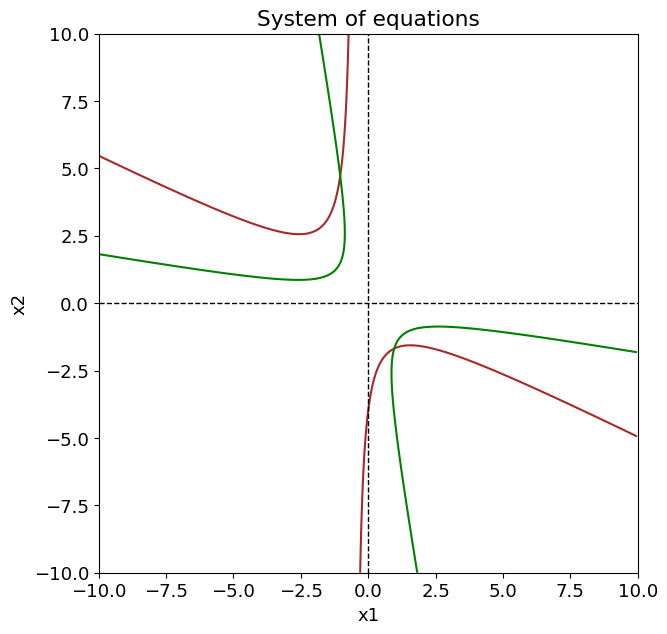

In [3]:
ploteqns()

$$ F_1 = x_1^{2}+2x_1x_2+x_2+4=\ 0 $$
$$ F_2 = x_2^{2}+6x_1x_2+x_1^{2}+6\ =\ 0 $$
$$
    \begin{bmatrix}
        \frac{\partial F_1(x_1,x_2)}{\partial x_1} & \frac{\partial F_1(x_1,x_2)}{\partial x_2} \\
        \frac{\partial F_2(x_1,x_2)}{\partial x_1} & \frac{\partial F_2(x_1,x_2)}{\partial x_2}
    \end{bmatrix}
    \begin{bmatrix}
        u_1 \\ u_2
    \end{bmatrix}
    =
    \begin{bmatrix}
        -F_1(x_1,x_2) \\
        -F_2(x_1,x_2) 
    \end{bmatrix}
$$

In [4]:
# The equations
def F1(x1,x2): return x1**2+2*x1*x2+x2+4
def F2(x1,x2): return x2**2+6*x1*x2+x1**2+6

# The Parital Derivatives of the equations
def dF1dx1(x1,x2): return 2*x1+2*x2
def dF1dx2(x1,x2): return 2*x1+1
def dF2dx1(x1,x2): return 2*x1+6*x2
def dF2dx2(x1,x2): return 6*x1+2*x2

# Solution
def solve(x1_initial, x2_initial):
    tolerance = 0.000001
    x_sol = np.array([[x1_initial], [x2_initial]])
    while True:
        A = np.array([[dF1dx1(x_sol[0,-1], x_sol[1,-1]), dF1dx2(x_sol[0,-1], x_sol[1,-1])],[dF2dx1(x_sol[0,-1], x_sol[1,-1]), dF2dx2(x_sol[0,-1], x_sol[1,-1])]])
        b = np.array([-F1(x_sol[0,-1], x_sol[1,-1]),-F2(x_sol[0,-1], x_sol[1,-1])])
        u = np.linalg.solve(A,b)
        x_sol = np.c_[x_sol, x_sol[:,-1]+u]
        if np.linalg.norm(u)<tolerance:
            print("Number of iterations = %d" % (x_sol.size/2))
            break
        elif x_sol.size/2 >= 500:
            print("Number of iterations = %d" % (x_sol.size/2))
            print(u)
            break
    if True:
        ploteqns()
        x_coord = x_sol[0,:]
        y_coord = x_sol[1,:]
        plt.plot(x_coord, y_coord, 'o-r', linewidth=1, ms=2)
        plt.plot(x_coord[0],y_coord[0],'ob', ms=10, label='initial guess')
        plt.plot(x_coord[-1],y_coord[-1],'og', ms=10, label='obtained solution')
        plt.legend()
    return x_sol[:,-1]

Number of iterations = 8


array([-1.0370868 ,  4.72507334])

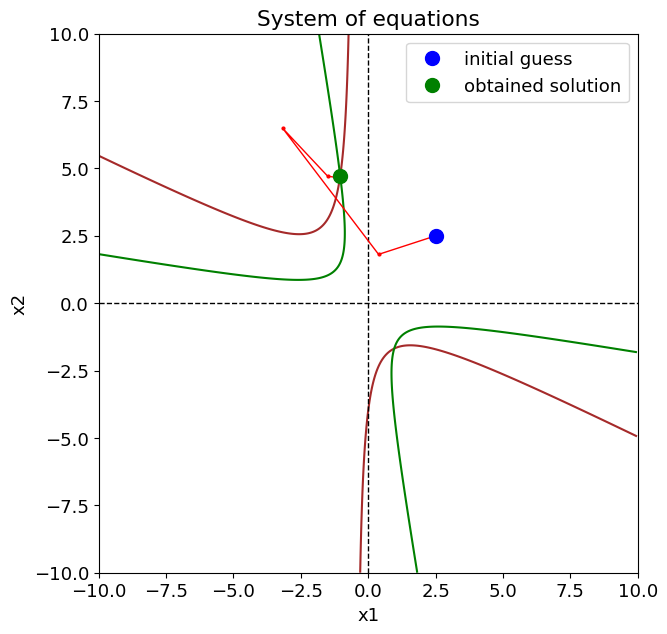

In [5]:
solve(2.5,2.5)

Number of iterations = 25


array([ 0.96774125, -1.6816735 ])

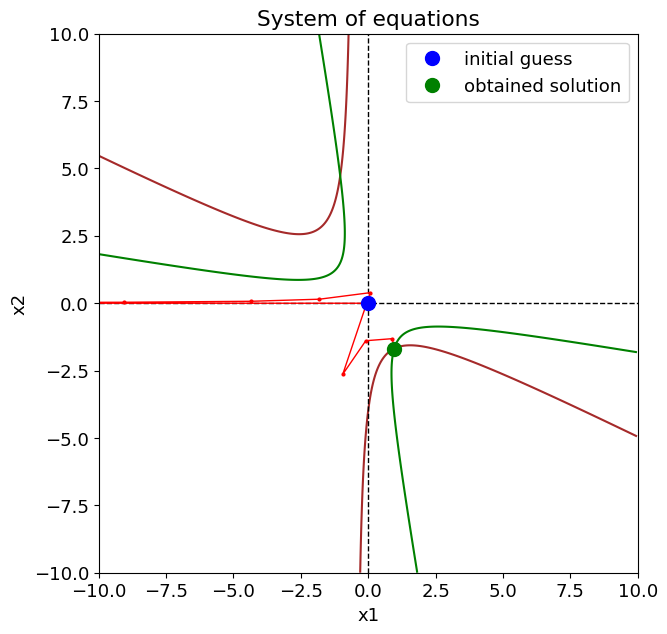

In [6]:
solve(0.00001,0.00001)

Number of iterations = 10


array([ 0.96774125, -1.6816735 ])

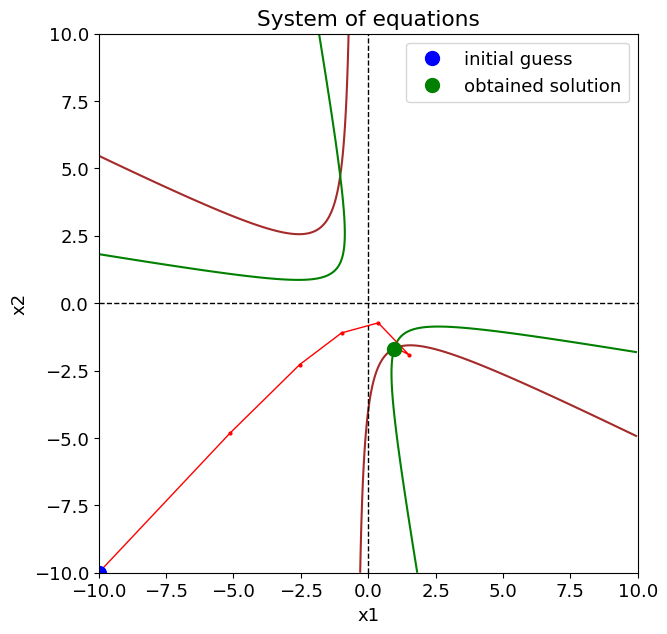

In [7]:
solve(-10,-10)